In [2]:
import random
import csv
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

In [32]:
class LogisticRegression:
    
    def __init__(self,alpha,featureNames,classLabel,iteration):
        self.iteration=iteration #iteration 
        self.classLabel = classLabel #class label 
        self.featureNames=featureNames #feature names 
        self.alpha=alpha #learning rate 
        self.featureVectorWeight=[] #theta values 
        for i in range(0,len(featureNames)+1): #random values 
            #self.featureVectorWeight.append(random.randint(0,0))
            self.featureVectorWeight.append(random.randint(1,2)/10.0)
        self.featureVectorWeight=np.array(self.featureVectorWeight) #numpy conversion
        
    def initiateProcess(self, trainFileName):
        xl = pd.ExcelFile(trainFileName)
        Sheet1 = xl.sheet_names
        #debug: print Sheet1[0]
        self.trainDataframe=xl.parse(Sheet1[0])
        #making feature vector,label vector 
        self.X=[]
        self.Y=[]
        #debug: print self.trainDataframe
        #iterating to access the dataframe to find out the features and classes 
        for index,row in self.trainDataframe.iterrows():
            #feature extraction and saving into list 
            _list=[]
            _list.append(1) #biasing feature 
            for i in self.featureNames:
                _list.append(row[i]*1.0)
            array = np.array(_list)
            self.X.append(array)
            #class label extraction 
            self.Y.append(row[self.classLabel]*1.0)
        print self.Y
        
    def train(self):
        iteration=0
        x_values=[]
        y_values=[]
        while True:
            iteration=iteration+1
            if(iteration==self.iteration):
                break 
            cf=self.cost_function()
            x_values.append(iteration)
            y_values.append(cf)
            print "cost function = ",cf
            self.theta_calculation()
        self.drawCostGraph(x_values,y_values)
        
    def drawCostGraph(self,x_values,y_values):
        #plt.plot(x_values,y_values,linestyle='-', marker='o')
        plt.plot(x_values,y_values)
        plt.show()
        return

    def cost_function(self):
        _cost=0.0
        for i in range(0,len(self.X)):
            res=self.htheta_function(self.X[i])
            value=self.Y[i]*1.0 * math.log10(res*1.0)+(1-self.Y[i]*1.0) * math.log10(1-res*1.0)
            _cost=_cost+value 
        _cost=_cost*-1.0*(1.0/len(self.X)) 
        return _cost 
    
    def theta_calculation(self):
        updated_theta_values=[]
        for i in range(0,len(self.featureVectorWeight)):
            _sum=0.0
            for j in range(0,len(self.X)):
                value=(self.htheta_function(self.X[j])-self.Y[j])*1.0
                _sum = _sum + value 
            _sum = _sum * self.alpha*(1.0/len(self.X)) 
            updated_theta_values.append(self.featureVectorWeight[i]-_sum)
        self.featureVectorWeight=np.array(updated_theta_values)
        return 
                
    def sigmoid(self,z):
        denominator=1+math.exp(-1.0*z)
        nominator=1.0
        return (nominator*1.0/denominator)
    
    def htheta_function(self,feature_i):
        z=np.dot(self.featureVectorWeight,feature_i) 
        return self.sigmoid(z)
        

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
cost function =  1.8476095656283114
cost function =  1.8428445131124396
cost function =  1.8380795694089418
cost function =  1.833314736820557
cost function =  1.82855001769881
cost function =  1.8237854144451493
cost function =  1.8190209295119042
cost function =  1.814256565403463
cost function =  1.8094923246771781
cost function =  1.804728209944775
cost function =  1.7999642238733005
cost fun

cost function =  0.5871394967967907
cost function =  0.5837461961529696
cost function =  0.580374000681202
cost function =  0.577023100634602
cost function =  0.5736936838788415
cost function =  0.5703859357612807
cost function =  0.5671000389799226
cost function =  0.5638361734523538
cost function =  0.5605945161848545
cost function =  0.5573752411418429
cost function =  0.5541785191158521
cost function =  0.5510045175982132
cost function =  0.5478534006506331
cost function =  0.5447253287778627
cost function =  0.5416204588016421
cost function =  0.5385389437361217
cost function =  0.53548093266495
cost function =  0.5324465706202232
cost function =  0.5294359984635023
cost function =  0.5264493527690729
cost function =  0.523486765709667
cost function =  0.5205483649448208
cost function =  0.5176342735120669
cost function =  0.5147446097211535
cost function =  0.511879487051469
cost function =  0.5090390140528601
cost function =  0.506223294250018
cost function =  0.5034324260506117

cost function =  0.31155063682204837
cost function =  0.31152165927659503
cost function =  0.31149330036451284
cost function =  0.3114655470340861
cost function =  0.3114383865051889
cost function =  0.3114118062637672
cost function =  0.31138579405642564
cost function =  0.31136033788512435
cost function =  0.3113354260019748
cost function =  0.311311046904136
cost function =  0.3112871893288158
cost function =  0.31126384224836123
cost function =  0.31124099486545365
cost function =  0.31121863660839166
cost function =  0.3111967571264702
cost function =  0.3111753462854492
cost function =  0.311154394163111
cost function =  0.31113389104490746
cost function =  0.311113827419691
cost function =  0.3110941939755318
cost function =  0.3110749815956174
cost function =  0.3110561813542334
cost function =  0.31103778451282527
cost function =  0.3110197825161367
cost function =  0.31100216698842803
cost function =  0.3109849297297679
cost function =  0.3109680627123989
cost function =  0.3

cost function =  0.31021586579628435
cost function =  0.3102158170517525
cost function =  0.3102157698301224
cost function =  0.31021572409398773
cost function =  0.31021567980678766
cost function =  0.31021563693279064
cost function =  0.3102155954370725
cost function =  0.310215555285501
cost function =  0.3102155164447185
cost function =  0.31021547888212486
cost function =  0.3102154425658606
cost function =  0.3102154074647909
cost function =  0.31021537354848955
cost function =  0.3102153407872238
cost function =  0.31021530915193923
cost function =  0.3102152786142439
cost function =  0.31021524914639526
cost function =  0.31021522072128455
cost function =  0.3102151933124245
cost function =  0.31021516689393364
cost function =  0.31021514144052476
cost function =  0.3102151169274916
cost function =  0.310215093330694
cost function =  0.3102150706265495
cost function =  0.3102150487920168
cost function =  0.31021502780458654
cost function =  0.3102150076422691
cost function =  0

cost function =  0.3102155220021972
cost function =  0.310215524355395
cost function =  0.3102155266868378
cost function =  0.3102155289966878
cost function =  0.31021553128510837
cost function =  0.3102155335522612
cost function =  0.31021553579830824
cost function =  0.31021553802341123
cost function =  0.3102155402277312
cost function =  0.3102155424114285
cost function =  0.3102155445746638
cost function =  0.31021554671759694
cost function =  0.31021554884038677
cost function =  0.3102155509431926
cost function =  0.31021555302617254
cost function =  0.3102155550894843
cost function =  0.3102155571332846
cost function =  0.3102155591577312
cost function =  0.310215561162979
cost function =  0.3102155631491838
cost function =  0.31021556511650084
cost function =  0.31021556706508313
cost function =  0.3102155689950854
cost function =  0.31021557090665935
cost function =  0.31021557279995793
cost function =  0.310215574675132
cost function =  0.3102155765323326
cost function =  0.31

cost function =  0.3102157449298253
cost function =  0.31021574506883853
cost function =  0.3102157452063852
cost function =  0.3102157453424801
cost function =  0.3102157454771393
cost function =  0.3102157456103772
cost function =  0.31021574574220884
cost function =  0.3102157458726491
cost function =  0.31021574600171253
cost function =  0.3102157461294135
cost function =  0.3102157462557666
cost function =  0.31021574638078553
cost function =  0.3102157465044847
cost function =  0.3102157466268777
cost function =  0.3102157467479784
cost function =  0.31021574686780023
cost function =  0.3102157469863568
cost function =  0.3102157471036613
cost function =  0.31021574721972683
cost function =  0.3102157473345663
cost function =  0.31021574744819314
cost function =  0.31021574756061976
cost function =  0.31021574767185855
cost function =  0.3102157477819221
cost function =  0.3102157478908231
cost function =  0.3102157479985735
cost function =  0.3102157481051848
cost function =  0.

cost function =  0.3102157574556511
cost function =  0.31021575746211844
cost function =  0.31021575746851743
cost function =  0.3102157574748484
cost function =  0.3102157574811123
cost function =  0.3102157574873095
cost function =  0.31021575749344105
cost function =  0.3102157574995074
cost function =  0.3102157575055095
cost function =  0.3102157575114479
cost function =  0.31021575751732305
cost function =  0.31021575752313624
cost function =  0.31021575752888764
cost function =  0.3102157575345778
cost function =  0.31021575754020775
cost function =  0.31021575754577774
cost function =  0.3102157575512888
cost function =  0.31021575755674125
cost function =  0.310215757562136
cost function =  0.3102157575674734
cost function =  0.3102157575727541
cost function =  0.3102157575779788
cost function =  0.31021575758314823
cost function =  0.3102157575882626
cost function =  0.3102157575933226
cost function =  0.31021575759832914
cost function =  0.31021575760328224
cost function =  

cost function =  0.3102157580179418
cost function =  0.31021575801844115
cost function =  0.3102157580189352
cost function =  0.31021575801942425
cost function =  0.3102157580199079
cost function =  0.3102157580203866
cost function =  0.3102157580208599
cost function =  0.31021575802132856
cost function =  0.31021575802179185
cost function =  0.31021575802225054
cost function =  0.31021575802270424
cost function =  0.31021575802315315
cost function =  0.31021575802359724
cost function =  0.3102157580240366
cost function =  0.3102157580244713
cost function =  0.3102157580249016
cost function =  0.3102157580253271
cost function =  0.3102157580257481
cost function =  0.3102157580261647
cost function =  0.31021575802657675
cost function =  0.31021575802698464
cost function =  0.31021575802738816
cost function =  0.3102157580277871
cost function =  0.31021575802818213
cost function =  0.3102157580285728
cost function =  0.3102157580289595
cost function =  0.3102157580293418
cost function = 

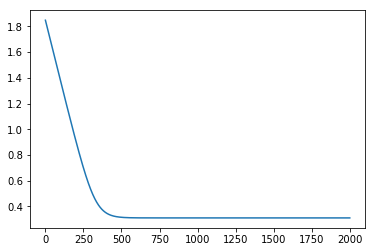

In [34]:
featureNames=["Temperature","Nausea","Lumbar pain","Urine pushing","Micturition pains","Burning of urethra","Nephritis of renal"]
classLabel="urinary bladder"
iteration=2000
lr=LogisticRegression(0.001,featureNames,classLabel,iteration)
lr.initiateProcess('/home/rizvee/Books/5-1/Text Mining/Codes/Logistric Regression/Data/DG.xlsx')
lr.train()

[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
cost function =  3.4044190493353876
cost function =  3.3951128808935715
cost function =  3.3858070555212225
cost function =  3.376501197058029
cost function =  3.36719539959409
cost function =  3.35788944341572
cost function =  3.348583469817481
cost function =  3.3392776505945925
cost function =  3.329971594879981
cost function =  3.320665649522405
cost function =  3.311360028016194
cost function =  3.3020540271576135
cost function =  3.292747997013681
cost function =  3.2834421676093535
cost funct

cost function =  0.7173919490991779
cost function =  0.7096897829912004
cost function =  0.7020465497678848
cost function =  0.6944638693326958
cost function =  0.6869433663641701
cost function =  0.6794866675946484
cost function =  0.6720953989821918
cost function =  0.664771182783939
cost function =  0.6575156345398583
cost function =  0.6503303599766128
cost function =  0.6432169518418245
cost function =  0.6361769866795921
cost function =  0.6292120215585907
cost function =  0.622323590764487
cost function =  0.6155132024687098
cost function =  0.6087823353859031
cost function =  0.6021324354325422
cost function =  0.5955649123993374
cost function =  0.5890811366500935
cost function =  0.5826824358597388
cost function =  0.576370091804145
cost function =  0.570145337214327
cost function =  0.5640093527074715
cost function =  0.5579632638070896
cost function =  0.5520081380643959
cost function =  0.5461449822928279
cost function =  0.5403747399273312
cost function =  0.5346982885197

cost function =  0.3336336804119827
cost function =  0.3336335535437652
cost function =  0.3336334310542621
cost function =  0.3336333127756493
cost function =  0.33363319854706464
cost function =  0.3336330882143033
cost function =  0.33363298162952926
cost function =  0.33363287865099667
cost function =  0.3336327791427853
cost function =  0.33363268297454807
cost function =  0.3336325900212692
cost function =  0.3336325001630351
cost function =  0.3336324132848107
cost function =  0.3336323292762318
cost function =  0.33363224803140257
cost function =  0.33363216944870416
cost function =  0.3336320934306099
cost function =  0.3336320198835115
cost function =  0.33363194871754936
cost function =  0.33363187984645437
cost function =  0.3336318131873939
cost function =  0.33363174866082546
cost function =  0.33363168619035655
cost function =  0.33363162570261273
cost function =  0.33363156712710745
cost function =  0.333631510396122
cost function =  0.3336314554445879
cost function =  

cost function =  0.3336295663961827
cost function =  0.3336295663321431
cost function =  0.33362956626961593
cost function =  0.3336295662085654
cost function =  0.33362956614895645
cost function =  0.3336295660907551
cost function =  0.33362956603392835
cost function =  0.3336295659784433
cost function =  0.33362956592426835
cost function =  0.3336295658713728
cost function =  0.33362956581972614
cost function =  0.33362956576929903
cost function =  0.3336295657200626
cost function =  0.3336295656719888
cost function =  0.3336295656250497
cost function =  0.333629565579219
cost function =  0.3336295655344705
cost function =  0.33362956549077877
cost function =  0.333629565448118
cost function =  0.33362956540646477
cost function =  0.3336295653657948
cost function =  0.3336295653260851
cost function =  0.33362956528731286
cost function =  0.33362956524945575
cost function =  0.3336295652124927
cost function =  0.3336295651764021
cost function =  0.33362956514116354
cost function =  0.

cost function =  0.3336295636867195
cost function =  0.33362956368663965
cost function =  0.33362956368656177
cost function =  0.3336295636864855
cost function =  0.33362956368641106
cost function =  0.33362956368633867
cost function =  0.3336295636862676
cost function =  0.33362956368619856
cost function =  0.3336295636861309
cost function =  0.33362956368606483
cost function =  0.33362956368600055
cost function =  0.33362956368593766
cost function =  0.3336295636858764
cost function =  0.3336295636858162
cost function =  0.3336295636857578
cost function =  0.3336295636857004
cost function =  0.33362956368564484
cost function =  0.33362956368559
cost function =  0.33362956368553703
cost function =  0.33362956368548513
cost function =  0.33362956368543417
cost function =  0.3336295636853847
cost function =  0.33362956368533636
cost function =  0.3336295636852891
cost function =  0.3336295636852431
cost function =  0.33362956368519814
cost function =  0.33362956368515384
cost function =

cost function =  0.3336295636833378
cost function =  0.33362956368333774
cost function =  0.33362956368333774
cost function =  0.3336295636833375
cost function =  0.33362956368333757
cost function =  0.3336295636833376
cost function =  0.33362956368333757
cost function =  0.3336295636833374
cost function =  0.3336295636833373
cost function =  0.33362956368333735
cost function =  0.3336295636833371
cost function =  0.3336295636833371
cost function =  0.3336295636833371
cost function =  0.33362956368333707
cost function =  0.3336295636833369
cost function =  0.33362956368333685
cost function =  0.3336295636833369
cost function =  0.33362956368333685
cost function =  0.3336295636833368
cost function =  0.3336295636833367
cost function =  0.3336295636833367
cost function =  0.3336295636833367
cost function =  0.3336295636833366
cost function =  0.3336295636833365
cost function =  0.3336295636833365
cost function =  0.33362956368333635
cost function =  0.3336295636833365
cost function =  0.

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.3336295636833348
cost function =  0.333629563

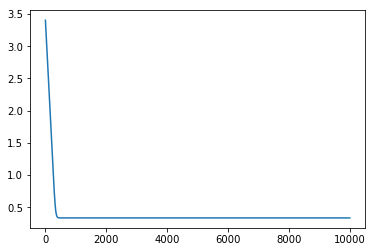

In [33]:
featureNames=["markA","markB"]
classLabel="Class"
iteration=10000
lr=LogisticRegression(0.001,featureNames,classLabel,iteration)
lr.initiateProcess('/home/rizvee/Books/5-1/Text Mining/Codes/Logistric Regression/Data/Marks.xlsx')
lr.train()